# **YULU Business Case Study**
-*By Mohith Saran*

Colab link: https://colab.research.google.com/drive/1BCOsj4cSUMdkX89P_SRewu2mQDniHPHy?usp=sharing

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## **Business Problem**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

### **Column Profiling:**

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    1. Clear, Few clouds, partly cloudy, partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno



### **Importing Dataset:**

In [ ]:
data=pd.read_csv("bike_sharing.csv")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### **Descriptive Statistics**

In [ ]:
data.shape

(10886, 12)

The data has almost 11k records and 12 features.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
for i in data.columns:
    print(f"{i}: datatype is {data[i].dtype} and {data[i].nunique()} unique values ")
    print('The unique values are')
    print(data[i].unique())
    print('-'*90)

datetime: datatype is object and 10886 unique values 
The unique values are
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
------------------------------------------------------------------------------------------
season: datatype is int64 and 4 unique values 
The unique values are
[1 2 3 4]
------------------------------------------------------------------------------------------
holiday: datatype is int64 and 2 unique values 
The unique values are
[0 1]
------------------------------------------------------------------------------------------
workingday: datatype is int64 and 2 unique values 
The unique values are
[0 1]
------------------------------------------------------------------------------------------
weather: datatype is int64 and 4 unique values 
The unique values are
[1 2 3 4]
------------------------------------------------------------------------------------------
temp: datatype i

- Need to convert datetime column which is in object datatype to datetime datatype.
- Can convert season, holiday, working day, weather into categorical values.
- Humidity, windspeed, casual, registered, count are continuous values.

#### Checking Missing Values

In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

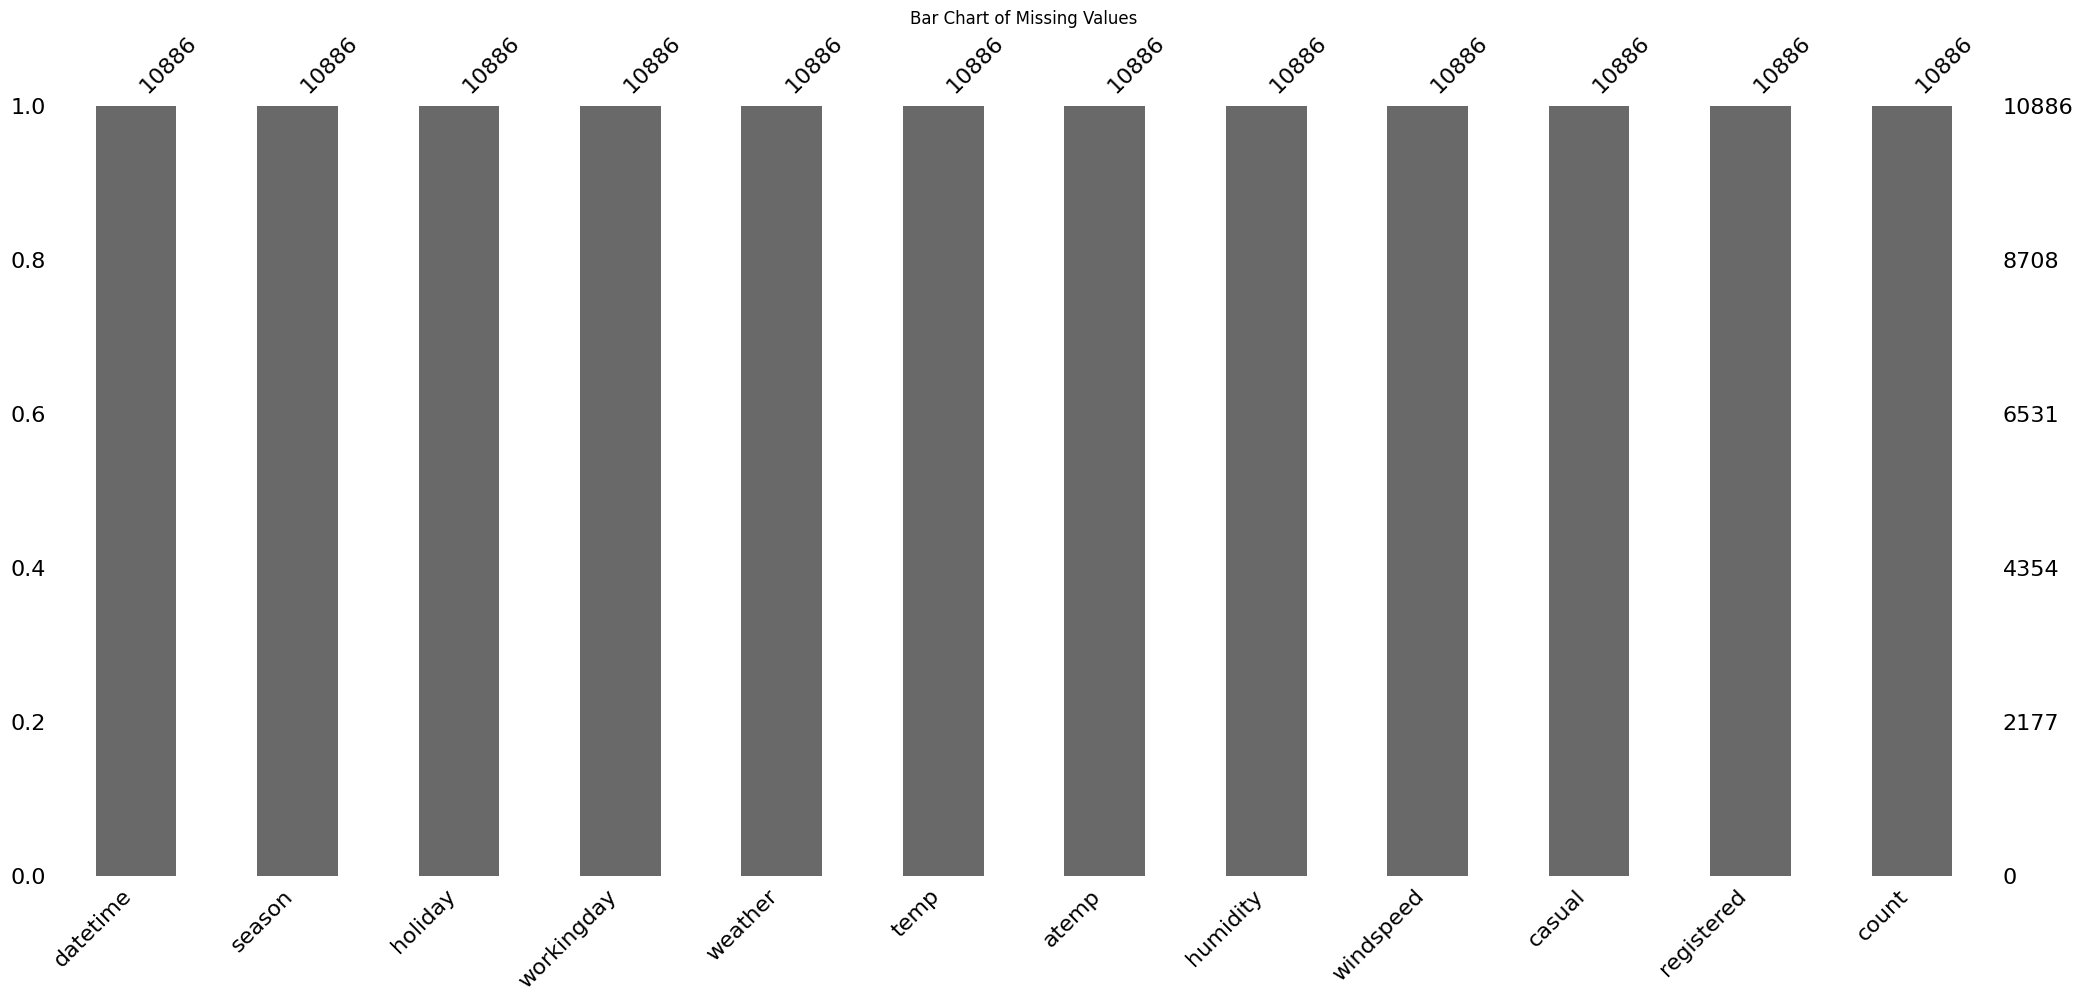

In [ ]:
msno.bar(data)
plt.title('Bar Chart of Missing Values')
plt.show()

- Graphical Representation says that there are no null values and there are `10886` records in each column.

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### **Duplicate Check**

In [ ]:
data.duplicated().sum()

0

- No duplicates found in the dataset

#### Converting the datetime column to datetime datatype

In [ ]:
data['datetime']=pd.to_datetime(data['datetime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## **Univariate Analysis**

In [ ]:
#finding out outliers
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

for i in numerical_cols:
    Q3=data[i].quantile(0.75)
    Q2=data[i].quantile(0.5)
    Q1=data[i].quantile(0.25)
    IQR=Q3-Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    lower_outliers=data[data[i]<lower_whisker]
    upper_outliers=data[data[i]>upper_whisker]

    print(f"Outlier detection of {i}")
    print("Minimum:", np.min(data[i]))
    print("Maximum:", np.max(data[i]))
    print(f'Initial Range (with outlier) : {(Q3-Q1)}')
    print("Q1:", Q1)
    print("Q2:", Q2)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Lower Whisker:", lower_whisker)
    print("Upper Whisker:", upper_whisker)
    print("Number of Lower Outliers:", len(lower_outliers))
    print("Number of Upper Outliers:", len(upper_outliers))


    print('.'*30)




Outlier detection of temp
Minimum: 0.82
Maximum: 41.0
Initial Range (with outlier) : 12.299999999999999
Q1: 13.94
Q2: 20.5
Q3: 26.24
IQR: 12.299999999999999
Lower Whisker: -4.51
Upper Whisker: 44.69
Number of Lower Outliers: 0
Number of Upper Outliers: 0
..............................
Outlier detection of atemp
Minimum: 0.76
Maximum: 45.455
Initial Range (with outlier) : 14.395
Q1: 16.665
Q2: 24.24
Q3: 31.06
IQR: 14.395
Lower Whisker: -4.927500000000002
Upper Whisker: 52.6525
Number of Lower Outliers: 0
Number of Upper Outliers: 0
..............................
Outlier detection of humidity
Minimum: 0
Maximum: 100
Initial Range (with outlier) : 30.0
Q1: 47.0
Q2: 62.0
Q3: 77.0
IQR: 30.0
Lower Whisker: 2.0
Upper Whisker: 122.0
Number of Lower Outliers: 22
Number of Upper Outliers: 0
..............................
Outlier detection of windspeed
Minimum: 0.0
Maximum: 56.9969
Initial Range (with outlier) : 9.996400000000001
Q1: 7.0015
Q2: 12.998
Q3: 16.9979
IQR: 9.996400000000001
Lower Whis

C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\38773495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col], palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\38773495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col], palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\38773495.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col], palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\38773495.py:10: FutureWarning: 

Passing `palette` without assign

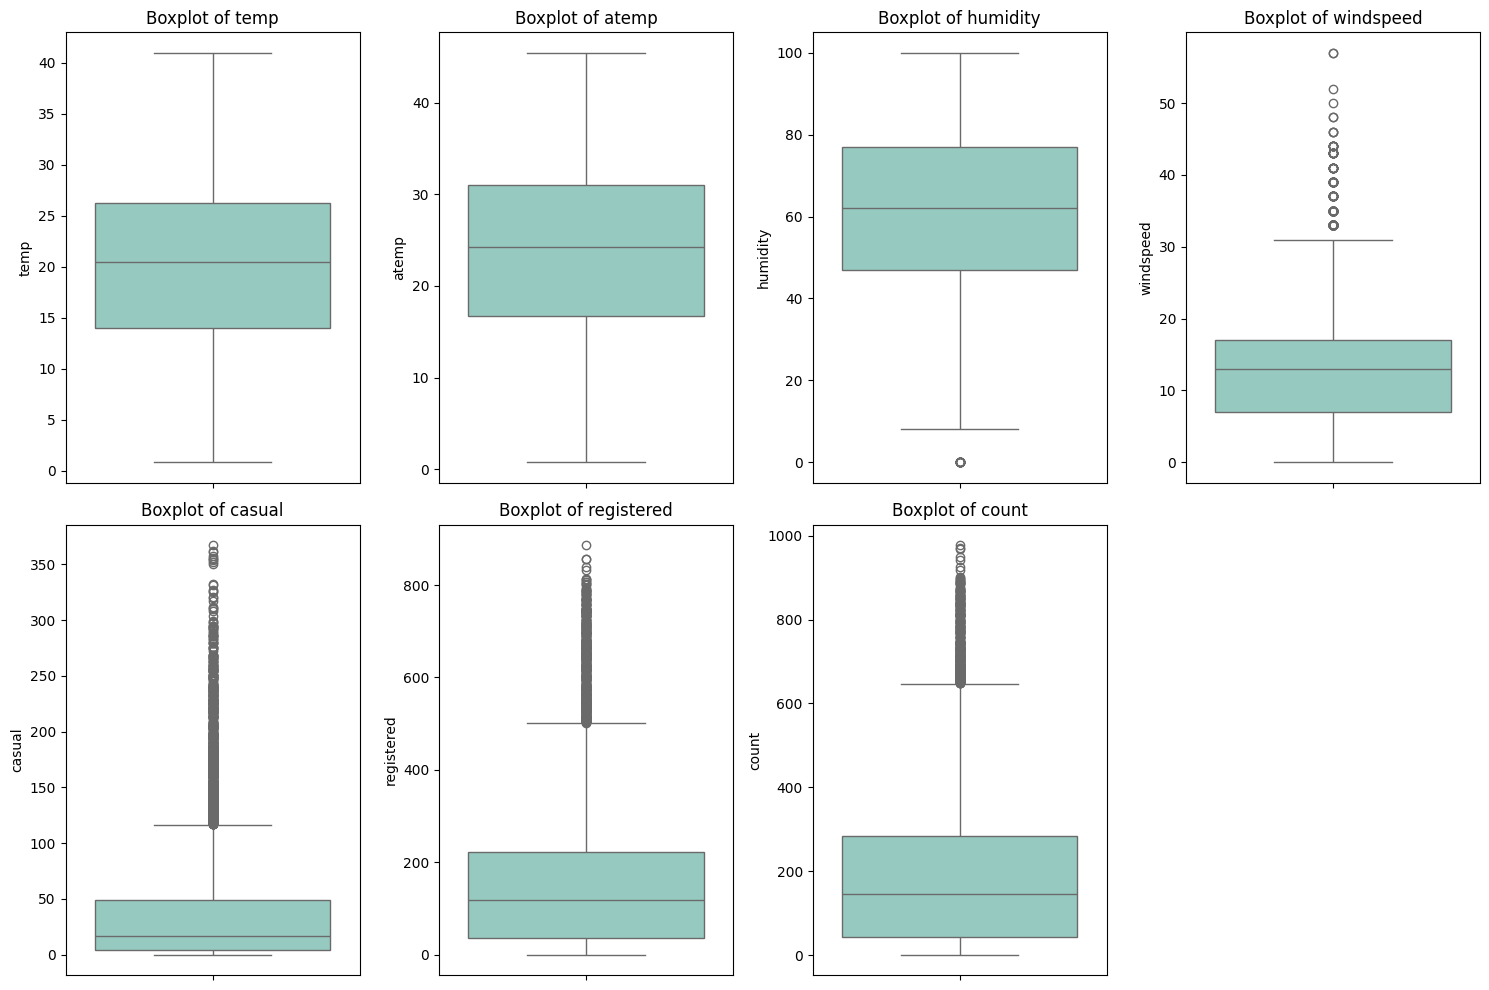

In [ ]:
# Plotting boxplots for all numerical columns in subplots

numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 10))

# Loop through each column and create a subplot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns grid
    sns.boxplot(data=data[col], palette='Set3')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


- Data shows that there are outliers present in data.

temp: 5th Percentile = 8.20, 95th Percentile = 32.80
atemp: 5th Percentile = 11.37, 95th Percentile = 34.85
humidity: 5th Percentile = 31.00, 95th Percentile = 94.00
windspeed: 5th Percentile = 0.00, 95th Percentile = 26.00
casual: 5th Percentile = 0.00, 95th Percentile = 128.00
registered: 5th Percentile = 4.00, 95th Percentile = 461.00
count: 5th Percentile = 7.00, 95th Percentile = 395.00


C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\620790199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col], palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\620790199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col], palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\620790199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[col], palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\620790199.py:11: FutureWarning: 

Passing `palette` without as

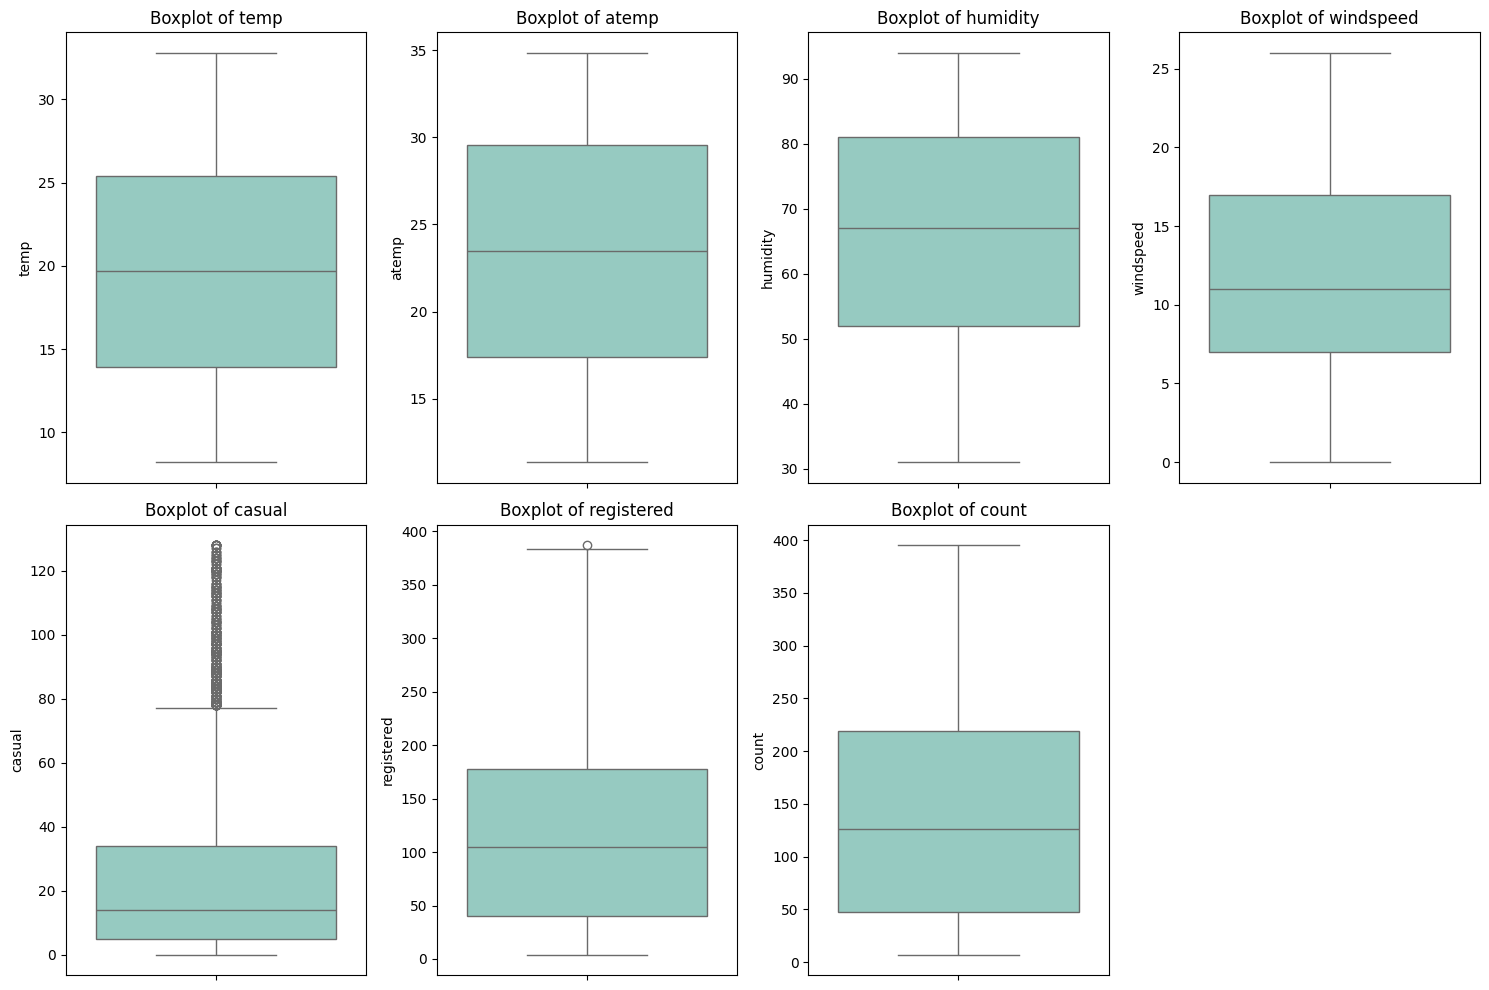

In [ ]:
# clipping 5% of data and 95% of data
for i in numerical_cols:
    low_bound=np.percentile(data[i],5)
    upper_bound=np.percentile(data[i],95)
    data=data[(data[i]>=low_bound)&(data[i]<=upper_bound)]
    print(f'{i}: 5th Percentile = {low_bound:.2f}, 95th Percentile = {upper_bound:.2f}')

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns grid
    sns.boxplot(data=data[col], palette='Set3')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

- Outliers are removed

C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\3351060985.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\3351060985.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\3351060985.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\3351060985.py:8: FutureWarning: 

Passing `palette

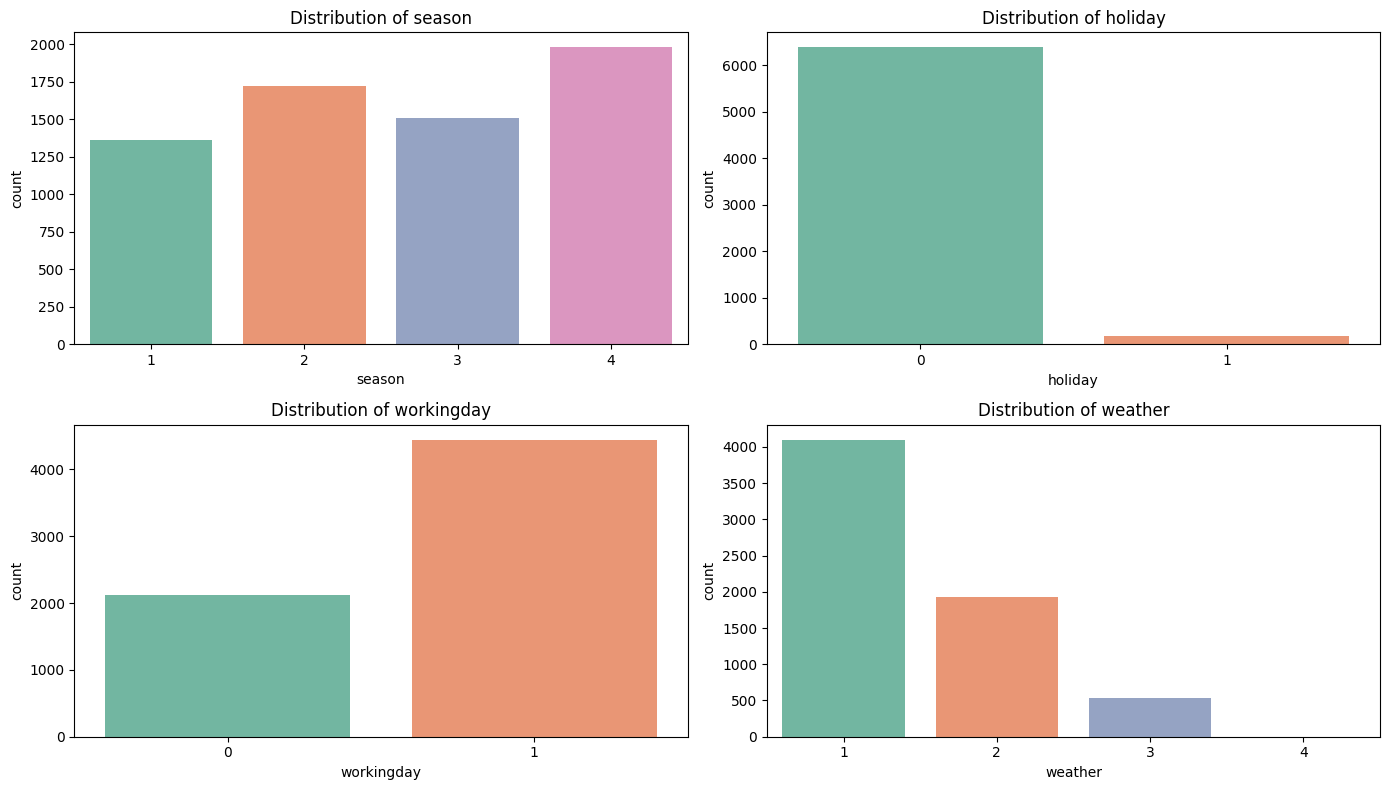

In [ ]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Create a figure for the plots
plt.figure(figsize=(14, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

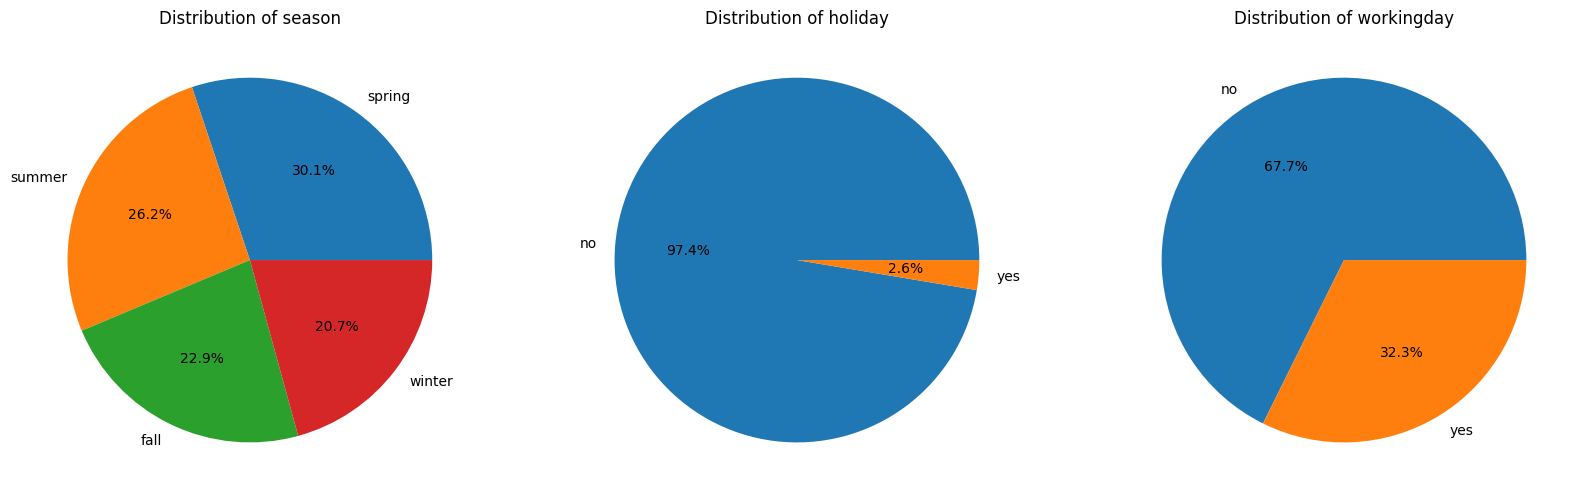

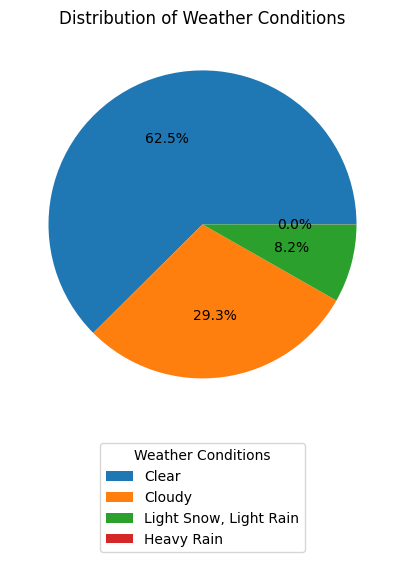

In [ ]:
plt.figure(figsize=(20,10))
categorical_cols=['season', 'holiday', 'workingday' ]
data1=data.copy()
data1['season']=data1['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data1['holiday']=data1['holiday'].map({0:'no', 1:'yes'})
data1['workingday']=data1['workingday'].map({0:'no', 1:'yes'})
data1['weather']=data1['weather'].map({1: 'Clear',2:'Cloudy',3:'Light Snow, Light Rain',4:'Heavy Rain'})

fig, axs = plt.subplots(1, len(categorical_cols), figsize=(20, 10))

# Plot the categorical columns
for i, col in enumerate(categorical_cols):
    axs[i].pie(data1[col].value_counts(), labels=data1[col].unique(), autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of {col}')

# Plot the weather chart at the bottom center
weather_counts = data1['weather'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(weather_counts, labels=None, autopct='%1.1f%%')

# Adding a legend at the bottom
plt.legend(weather_counts.index, title="Weather Conditions", loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.title("Distribution of Weather Conditions")
plt.show()

- The dataset appears to be evenly spread across all seasons, implying that bike rentals occur year-round. However, further analysis could explore seasonal patterns in bike rentals, as seasonality likely affects rental counts (e.g., higher rentals during warmer seasons).
Holiday:

- The vast majority of entries are from non-holiday days, which suggests that holidays are relatively rare in the dataset. This might suggest that bike rentals are more routine and tied to daily commuting patterns, rather than special occasions or holidays.
Working Day:

- The distribution shows that most data points are from working days, indicating that bike rentals are commonly used for commuting purposes. This is consistent with the larger number of registered users, who are likely commuting on weekdays.
Weather:

- The data show that most rentals occur in good weather conditions (weather type 1). Fewer rentals are made under adverse weather conditions (e.g., weather type 3 or worse), which suggests that poor weather may significantly reduce bike usage.

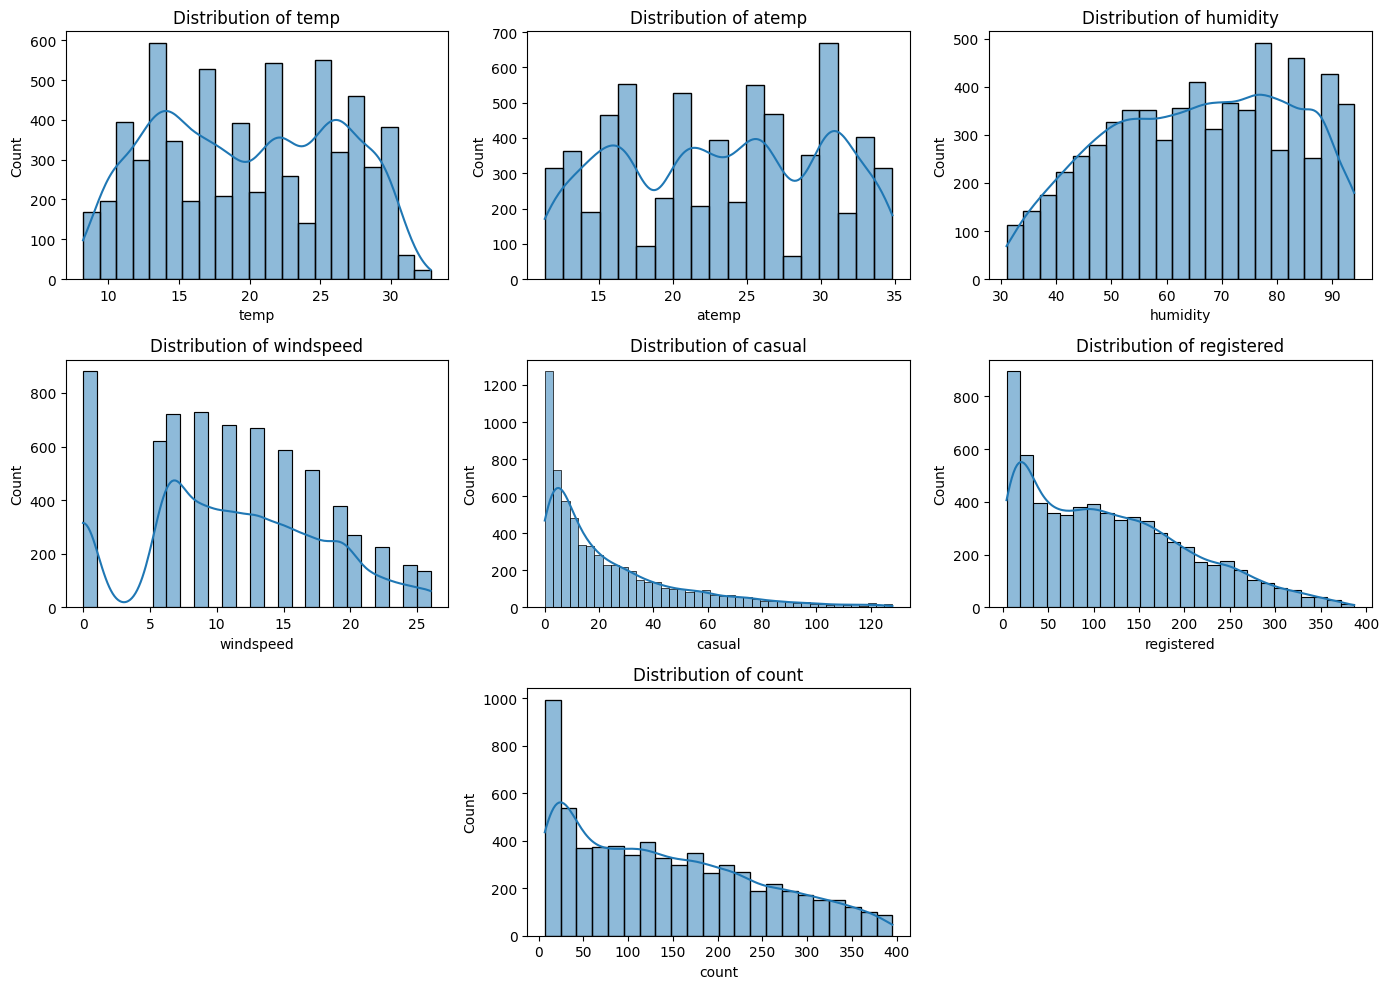

In [ ]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Create a figure for the plots
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.subplot(3,3,8)
sns.histplot(data=data, x='count',kde=True)
plt.title('Distribution of count')

plt.tight_layout()
plt.show()

- The distributions of temp and atemp are bell-shaped, indicating that most bike rentals occurred during moderate temperatures. There are fewer rentals during extreme temperatures, which suggests that biking is more popular in comfortable weather conditions.
- The close alignment between the distributions of temp and atemp shows that the "feels-like" temperature closely tracks the actual temperature, likely due to relatively stable weather conditions.
- The humidity distribution is skewed toward higher values, with a peak around 60-80%. This suggests that the majority of bike rentals occurred in relatively humid conditions, indicating that humidity alone may not deter biking unless it reaches extreme levels.
- The windspeed distribution is heavily right-skewed, with a significant portion of data showing low or near-zero wind speeds. Low wind speeds likely encourage biking, as it is more comfortable and easier to ride in such conditions.
- The distributions of both casual and registered users are highly skewed, indicating that most observations involve fewer bike rentals, with occasional spikes in usage. However, registered users generally have higher counts than casual users, suggesting that the bike-sharing service is more regularly used by registered members, who might be commuters or frequent users.
- Casual users show a wider range of variability than registered users, potentially implying that casual usage might be more influenced by weather conditions or time of year (e.g., tourism seasons, holidays).
- The total rental count shows a similar pattern to the registered users' distribution. This is expected, as the majority of rentals come from registered users. The total count distribution indicates that on most days, fewer rentals are made, but there are some days with very high usage.

### **Bike Rental by time frame**

C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\4263103209.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='week',y='count',data=data,palette='Set3')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\4263103209.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month',y='count',data=data,palette='Set3')


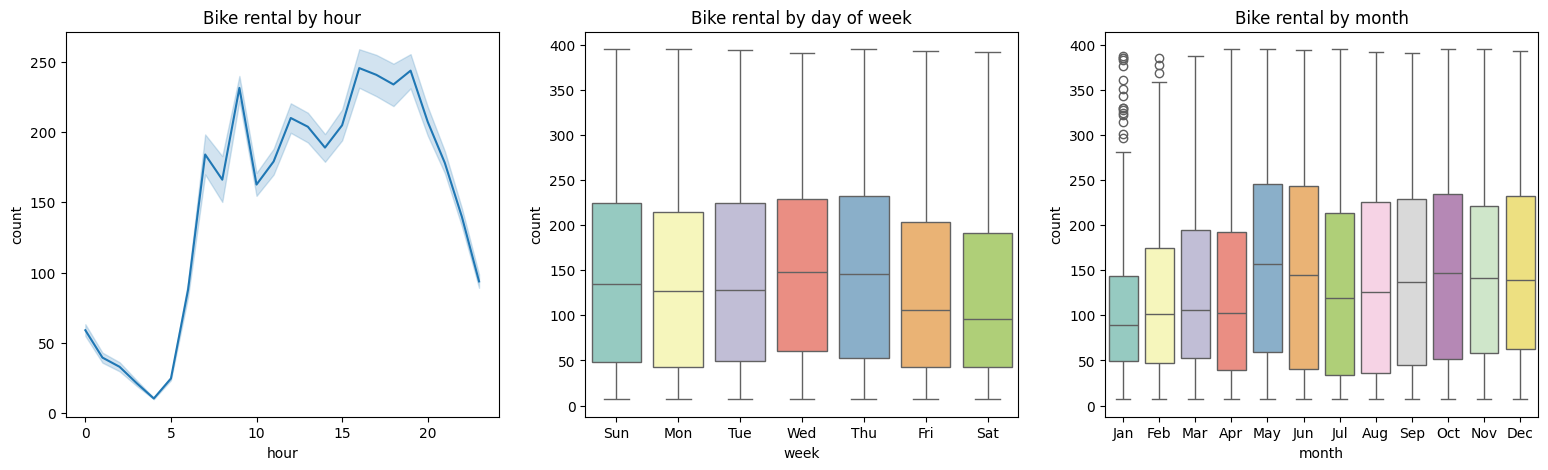

In [ ]:
data['hour']=data['datetime'].dt.hour
data['week']=data['datetime'].dt.day_of_week
data['month']=data['datetime'].dt.month

#Univariate analysis by hour, day of week, month
plt.figure(figsize=(19,5))

plt.subplot(1,3,1)
sns.lineplot(data=data,x='hour',y='count')
plt.title('Bike rental by hour')

plt.subplot(1,3,2)
sns.boxplot(x='week',y='count',data=data,palette='Set3')
plt.xticks(labels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ticks=[0,1,2,3,4,5,6])
plt.title('Bike rental by day of week')

plt.subplot(1,3,3)
sns.boxplot(x='month',y='count',data=data,palette='Set3')
plt.title('Bike rental by month')
plt.xticks(labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ticks=range(12))

plt.show()

- Rentals peak twice daily, around 8 AM and 5-6 PM, indicating that the service is heavily used for commuting during typical work hours.
- Rentals are higher during the weekdays, with a noticeable drop on weekends (Saturday and Sunday). This suggests that the bike-sharing system is mainly used for weekday commuting.
- Rentals increase steadily during the warmer months (May to October), peaking in summer (July-August). Rentals are lower in the colder months (November to February).

## **Bivariate Analysis**

C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\2705143275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=n,y='count',data=data,palette='Set2')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\2705143275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=n,y='count',data=data,palette='Set2')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\2705143275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=n,y='count',data=data,palette='Set2')
C:\Users\mohit\AppData\Local\Temp\ipykernel_16092\2705143275.py:6: FutureWarning: 

Pass

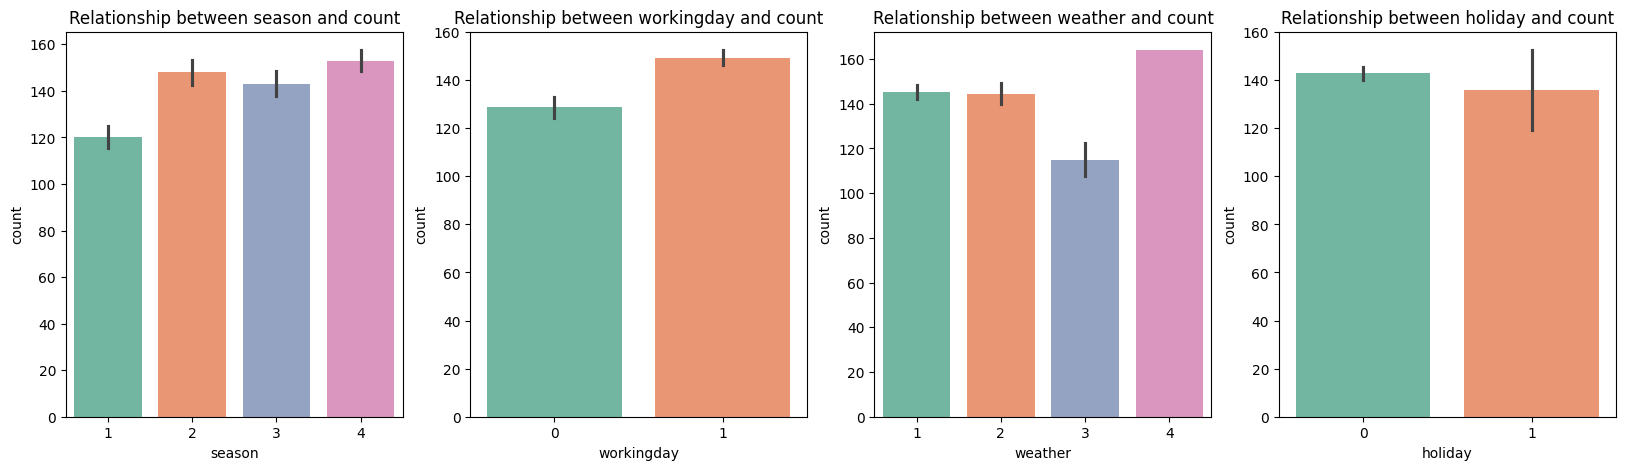

In [ ]:
#Relationship between workingday and count
plt.figure(figsize=(20,5))

for i,n in enumerate(['season','workingday','weather','holiday'],1):
    plt.subplot(1,4,i)
    sns.barplot(x=n,y='count',data=data,palette='Set2')
    plt.title(f'Relationship between {n} and count')
plt.show()


- Number of customers in season 4 i.e; in Winter has highest sales over the year
- Demand in bikes on working day is high
- Demand in bikes in the weather condition 4 i.e; Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is the highest
- Demand in bikes on non holiday is more when compared on holiday.

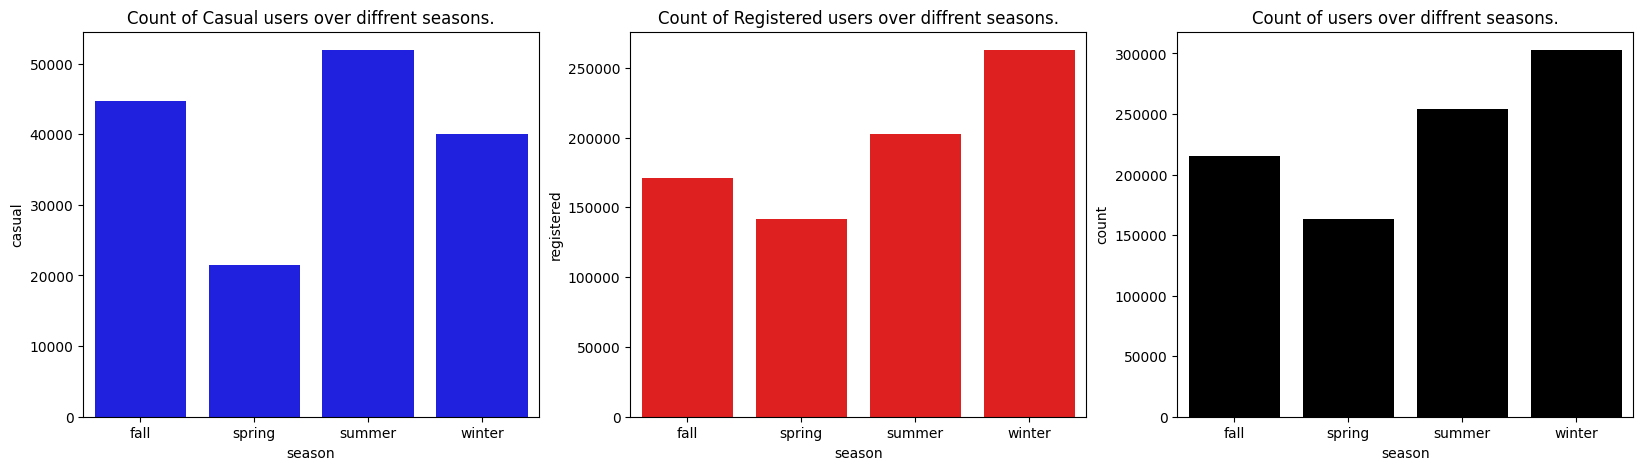

In [ ]:
data_date_season = data1.groupby(["season"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
fig = plt.figure(figsize=(20,5))
i = 0
for col,title in [("casual","Count of Casual users over diffrent seasons."),
                  ("registered","Count of Registered users over diffrent seasons."),
                  ("count","Count of users over diffrent seasons.")]:
    i = i + 1
    plt.subplot(1,3,i)
    ax = sns.barplot(data_date_season,x="season",y=col,color="bryckm"[np.random.randint(0,6)])
    ax.set(title = title)

- Casual users mostly used bike in summer season
- Registered users mostly used bike in winter

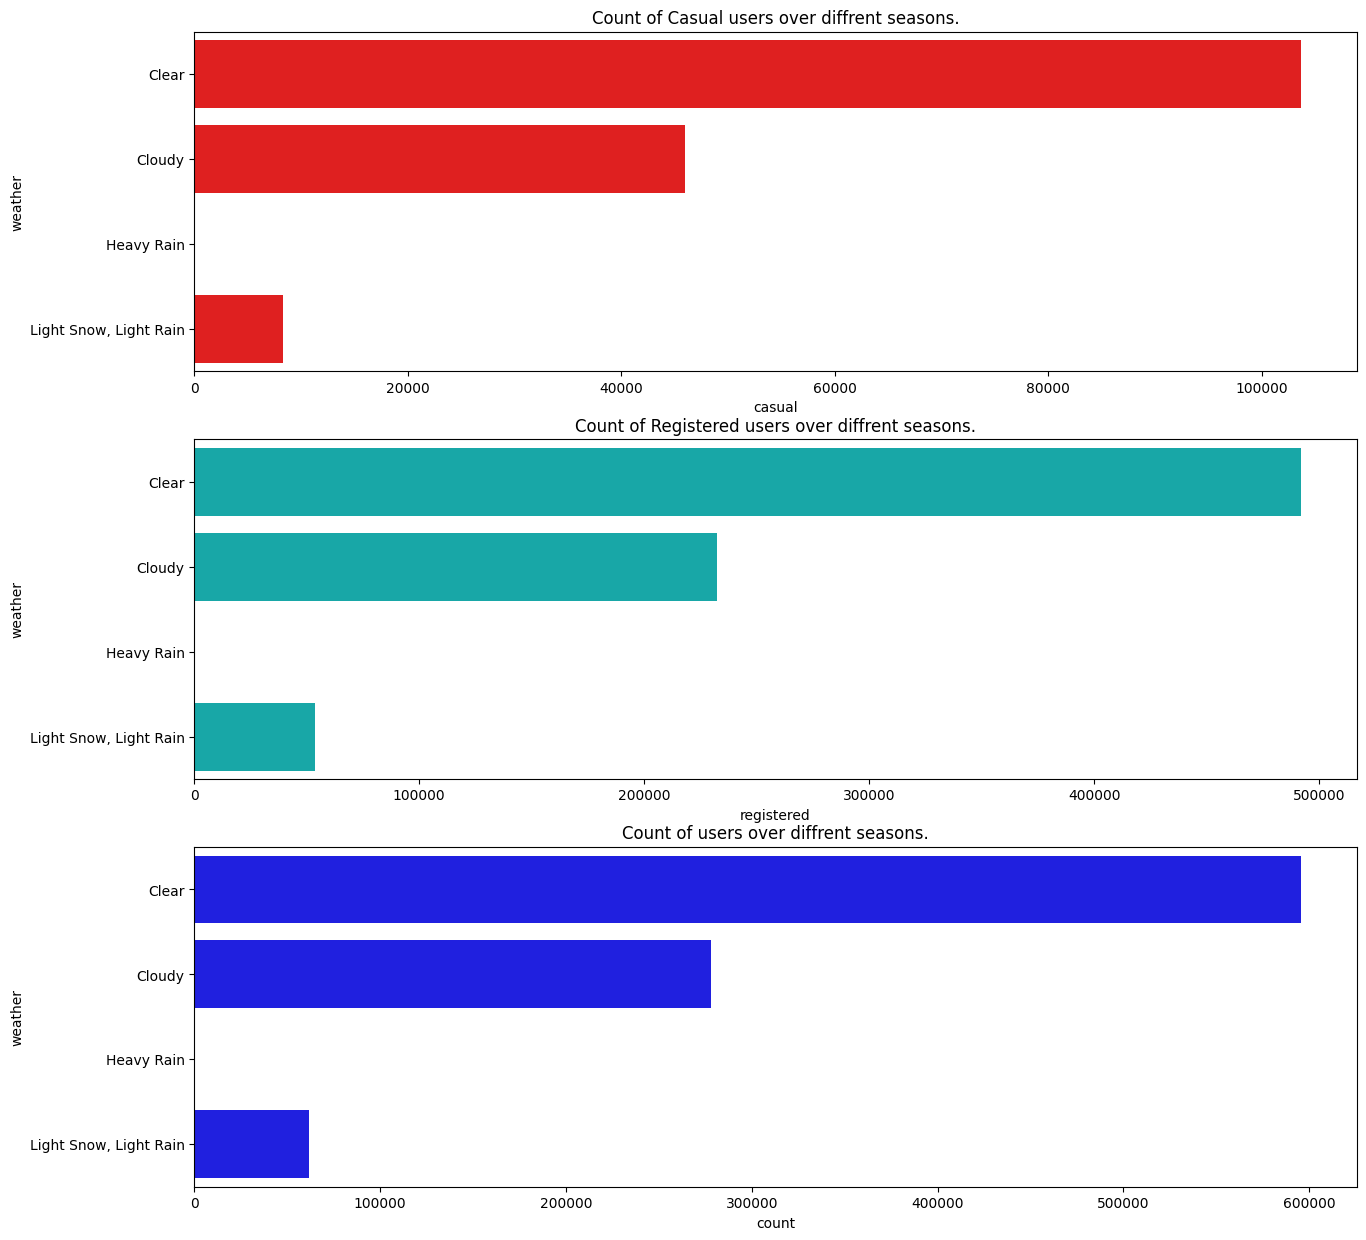

In [ ]:
data_date_weather = data1.groupby(["weather"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
fig = plt.figure(figsize=(15,15))
i = 0
for col,title in [("casual","Count of Casual users over diffrent seasons."),
                  ("registered","Count of Registered users over diffrent seasons."),
                  ("count","Count of users over diffrent seasons.")]:
    i = i + 1
    plt.subplot(3,1,i)
    ax = sns.barplot(data_date_weather,x=col,y="weather",color="bryckm"[np.random.randint(0,6)],orient="h")
    ax.set(title = title)

- Any of the user did not use bikes in Heavy rain
- All the users mostly used bikes in Clear weather.

### **Correlation**

In [ ]:
data[numerical_cols].corr()

,temp,atemp,humidity,windspeed,casual,registered
temp,1.000000,0.982837,0.064954,-0.005581,0.396309,0.141374
atemp,0.982837,1.000000,0.064000,-0.039365,0.398199,0.141297
humidity,0.064954,0.064000,1.000000,-0.253459,-0.287981,-0.269236
windspeed,-0.005581,-0.039365,-0.253459,1.000000,0.102844,0.116147
casual,0.396309,0.398199,-0.287981,0.102844,1.000000,0.537367
registered,0.141374,0.141297,-0.269236,0.116147,0.537367,1.000000


<Axes: >

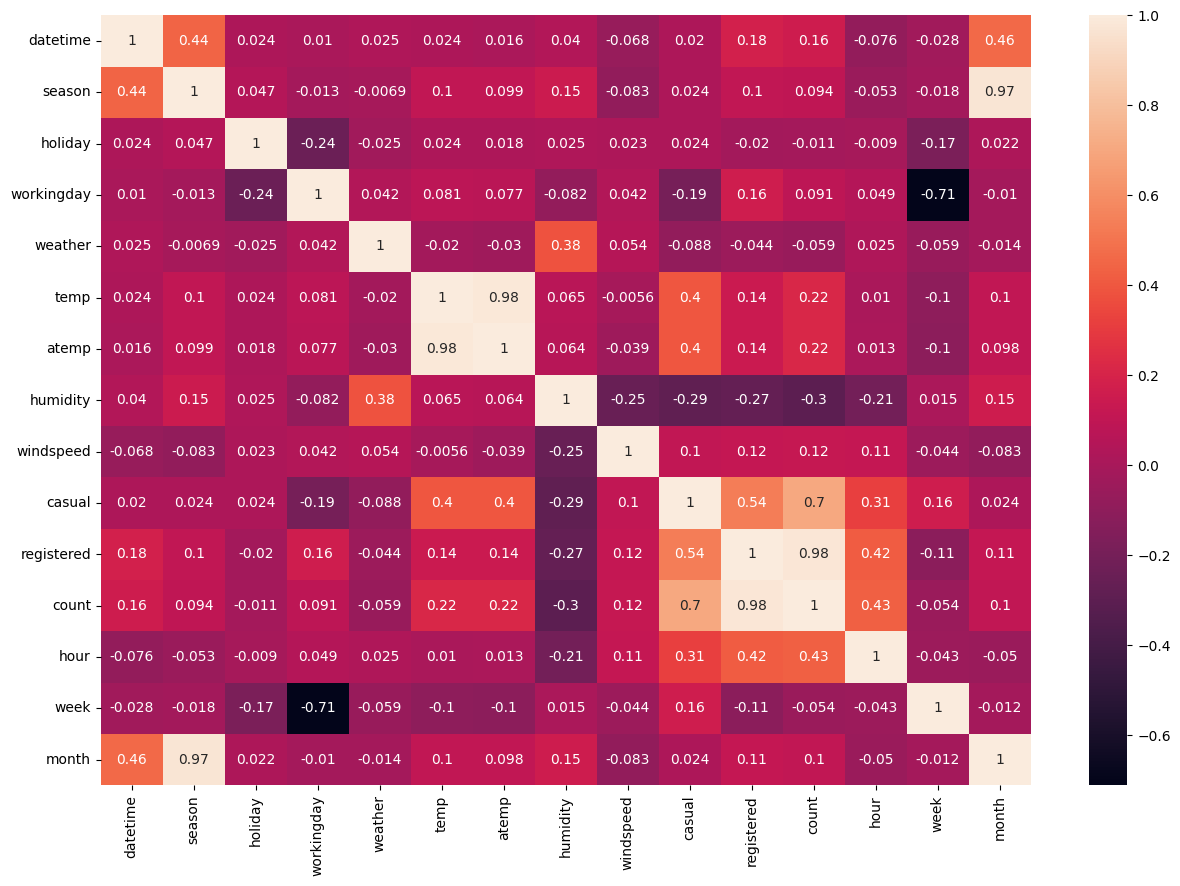

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

- **Highly Correlated Variables**
    - Season and datetime with correlation of 0.44
    - Month and datetime with correlation of 0.46 as month is derived from datetime feature
    - Season and month with correlation of 0.97
    - atemp and temp are highly correlated variables with correlation of 0.98
    - casual and registered with correlation of 0.54
    - casual and count with correlation of 0.7
    - Registered and hour with correlation of 0.42
    - Registered and count with correlation of 0.98
    
- **Weak Correlated Variables**
    - Week and working day with correlation of -0.71
    


## **Hypothesis Testing**
### **Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

- Bike ride on Weekend and Weekday => **Categorical**
- Number of Bike rides => **Continuous**
- Categorical vs Continuous => **ttest**
- To check significant difference use **two sample ttest_ind**

In [ ]:
#H0: Mean of no of Bike rides on Weekdays is same as Mean of no of Bike rides on Weekends
#Ha: Mean of no of Bike rides on Weekdays is not same as Mean of no of Bike rides on Weekends

#Check Two tail test
from scipy.stats import ttest_ind
significance = 0.05

#Category wise
data_weekday = data[data['workingday']==1]
data_weekend = data[data['workingday']==0]

In [ ]:
ttest_stat, pval = ttest_ind(data_weekday['count'], data_weekend['count'], alternative='two-sided')
print(f'Ttest-Stat:{ttest_stat}')
print(f'Pval:{pval}')
if pval<significance:
    print('Reject H0, Mean of no of Bike rides on Weekdays is not same as Mean of no of Bike rides on Weekends')
else:
    print('Fail to Reject H0, Mean of no of Bike rides on Weekdays is same as Mean of no of Bike rides on Weekends')

Ttest-Stat:7.396382991696095
Pval:1.5739094380024563e-13
Reject H0, Mean of no of Bike rides on Weekdays is not same as Mean of no of Bike rides on Weekends


- As per Univariate Analysis done above, The number of bike rides on week days are more when compared on weekends.
### **Case-2:**
### **Check if there any significant difference between the no. of bike rides on Holidays and Non Holiday?**

In [ ]:
data_holiday=data[data['holiday']==1]
data_non_holiday=data[data['holiday']==0]

ttest_stat, pval = ttest_ind(data_holiday['count'], data_non_holiday['count'], alternative='two-sided')
print(f'Ttest-Stat:{ttest_stat}')
print(f'Pval:{pval}')

if pval<significance:
    print('Reject H0, Mean of no of Bike rides on Holidays is not same as Mean of no of Bike rides on Non Holidays')
else:
    print('Fail to Reject H0, Mean of no of Bike rides on Holidays is same as Mean of no of Bike rides on Non Holidays')

Ttest-Stat:-0.8580778053866989
Pval:0.39088083687831976
Fail to Reject H0, Mean of no of Bike rides on Holidays is same as Mean of no of Bike rides on Non Holidays


### **Check if the demand of bicycles on rent is the same for different Weather conditions?**

- Number of bicycles on rent => **Continuous**
- Weather conditions => **Categorical**
- Continuous vs Categorical (number of categories>2) => **F_oneway ANOVA**

pval_shapiro:0.5705638451648664
Fail to Reject H0, The sample is normal distribution


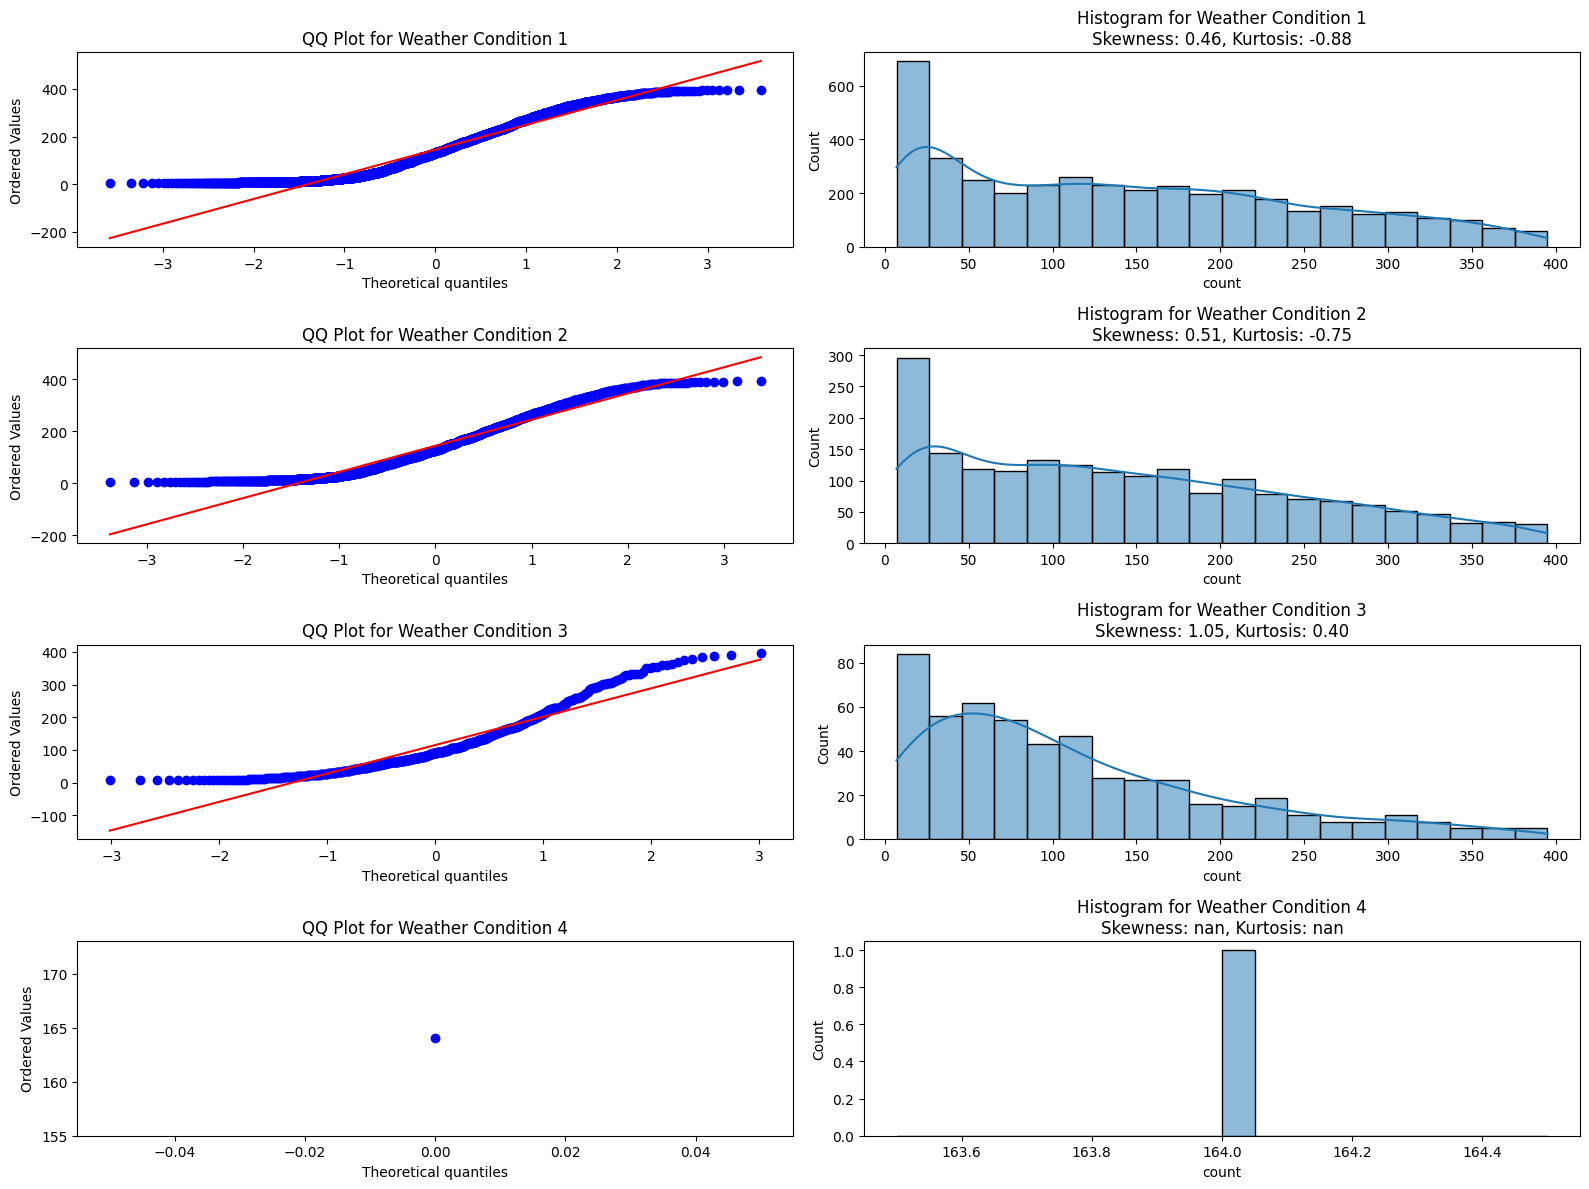

pval_levene:8.043429066509994e-13
Reject H0, The sample doesn't have similar variances
Since it doesnt meet any of the assumptions can not perform ANOVA, Perform Kruskal test to check Hypothesis
Performing Kruskal Wallis Test
Kruskal-Wallis Test p-value: 1.1739962543114809e-07
Reject H0, there is a significant difference in bicycle demand across different weather conditions


In [ ]:
from scipy.stats import f_oneway,shapiro,levene

#Check normality and equal variances by shapiro test and levene test
#Checking normality
#H0: The sample is normal distribution
#H1: The sample is not normal distribution

# Weather conditions
weather=data1.groupby('weather')['count'].agg(['count'])

stat,pval_shapiro=shapiro(weather)
print(f'pval_shapiro:{pval_shapiro}')
if pval_shapiro<significance:
    print('Reject H0, The sample is not normal distribution')
else:
    print('Fail to Reject H0, The sample is normal distribution')

#Check normality by visualization for weather by histogram, qqplot, skewness and kurtosis

import scipy.stats as stats

# Extract the 'count' data grouped by weather conditions
weather_data = [data[data['weather'] == i]['count'] for i in range(1, 5)]

# Calculate skewness and kurtosis for each weather group
skewness = [stats.skew(group) for group in weather_data]
kurtosis = [stats.kurtosis(group) for group in weather_data]

# Plot QQ plots and histograms for each weather condition
plt.figure(figsize=(16, 12))

for i in range(4):
    plt.subplot(4, 2, 2*i + 1)
    stats.probplot(weather_data[i], dist="norm", plot=plt)
    plt.title(f'QQ Plot for Weather Condition {i+1}')

    plt.subplot(4, 2, 2*i + 2)
    sns.histplot(weather_data[i], kde=True, bins=20)
    plt.title(f'Histogram for Weather Condition {i+1}\nSkewness: {skewness[i]:.2f}, Kurtosis: {kurtosis[i]:.2f}')

plt.tight_layout()
plt.show()

# Output skewness and kurtosis values
skewness, kurtosis




# print(weather)
#The sample is not normal distribution
#Check similar variances or not
#H0: The sample has similar variances
#H1: The sample doesn't have similar variances

stat,pval_levene=levene(data[data['weather']==1]['count'],data[data['weather']==2]['count'],data[data['weather']==3]['count'],data[data['weather']==4]['count'])
print(f'pval_levene:{pval_levene}')
if pval_levene<significance:
    print('Reject H0, The sample doesn\'t have similar variances')
else:
    print('Fail to Reject H0,The sample has similar variances ')

# Since it doesnt meet any of the assumptions can not perform ANOVA, Perform Kruskal test to check Hypothesis
print('Since it doesnt meet any of the assumptions can not perform ANOVA, Perform Kruskal test to check Hypothesis')
print('Performing Kruskal Wallis Test')
#H0: There is no significant difference in bicycle demand across different weather conditions
#H1: There is a significant difference in bicycle demand across different weather conditions

from scipy.stats import kruskal

# Perform the Kruskal-Wallis H-test for independent samples
stat, pval_kruskal = kruskal(
    data[data['weather'] == 1]['count'],
    data[data['weather'] == 2]['count'],
    data[data['weather'] == 3]['count'],
    data[data['weather'] == 4]['count']
)

# Print the result of the Kruskal-Wallis test
print(f'Kruskal-Wallis Test p-value: {pval_kruskal}')
if pval_kruskal < significance:
    print('Reject H0, there is a significant difference in bicycle demand across different weather conditions')
else:
    print('Fail to Reject H0, there is no significant difference in bicycle demand across different weather conditions')


### **Inference and Conclusion**
**Shapiro-Wilk Test for Normality:**

- **p-value:** 0.5706
- **Conclusion:** The p-value is greater than the significance level (0.05), so we fail to reject the null hypothesis. This indicates that the sample data is normally distributed.

**Levene's Test for Equality of Variances:**

- **p-value:** 8.04x10^-13
- **Conclusion:** The p-value is much smaller than the significance level (0.05), so we reject the null hypothesis. This indicates that the variances across the different weather conditions are not equal.

Since the assumption of equal variances is violated, ANOVA is not suitable. Instead, the Kruskal-Wallis Test was performed.

#### **QQ Plots and Histograms**
- **Weather Condition 1 (Clear, Few clouds, partly cloudy, partly cloudy):**

    **QQ Plot:** The QQ plot shows a deviation from the straight line, particularly in the tails, indicating that the data distribution is not perfectly normal. There is a slight positive skewness.

    **Histogram:** The histogram shows that the distribution is right-skewed with a long tail. The majority of the data is concentrated at lower rental counts, with a gradual decrease as the count increases.

    **Skewness:** 0.46 (indicating slight positive skewness).

    **Kurtosis:** -0.88 (indicating the distribution is flatter than normal)

- **Weather Condition 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist):**

    **QQ Plot:** Similar to Weather Condition 1, the QQ plot shows deviations from the straight line, especially in the tails, indicating non-normality with a slight positive skewness.

    **Histogram:** The histogram is also right-skewed, with a peak at the lower rental counts and a gradual decrease as the rental count increases.

    **Skewness:** 0.51 (indicating positive skewness).

    **Kurtosis:** -0.75 (indicating the distribution is flatter than normal).

- **Weather Condition 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds):**

    **QQ Plot:** The QQ plot for light snow or rain shows more pronounced deviations from the line, indicating greater non-normality and a stronger positive skew.

    **Histogram:** The distribution is right-skewed with a peak at lower counts, but with a noticeable number of moderate rental counts.

    **Skewness:** 1.05 (indicating stronger positive skewness).

    **Kurtosis:** 0.40 (indicating a slightly peaked distribution)

- **Weather Condition 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog):**

    **QQ Plot:** There is very little data for this condition, leading to a QQ plot that doesn't provide meaningful information due to the lack of variability.

    **Histogram:** The histogram reflects this, showing a single peak at a specific rental count, with no other variability.

    **Skewness:** Not applicable due to insufficient data.

    **Kurtosis:** Not applicable due to insufficient data

- There is a clear trend of decreasing rentals as weather conditions worsen (e.g., from clear weather to heavy rain/snow).


**Kruskal-Wallis Test:**
- **p-value:** 1.17x10^-7
- **Conclusion:** The p-value is much smaller than the significance level (0.05), so we reject the null hypothesis. This indicates that there is a significant difference in bicycle demand across different weather conditions.

##### **Recommendation based on Analysis**
- It indicates that weather conditions impact bicycle demand. In such a case, you might recommend adjusting bicycle availability or pricing strategies based on the weather forecast to maximize efficiency and customer satisfaction.
- **Weather-Based Pricing Strategy:**

    - Increase Rental Prices During Favorable Weather: Since demand varies significantly, rental prices could be adjusted based on the weather forecast. Higher prices could be charged during clear or misty weather conditions when demand is likely higher.
- **Discounts During Poor Weather:**
    - Offer discounts during light snow/rain or heavy rain/snow conditions to encourage rentals despite the less favorable weather.

- **Real-Time Notifications:**
    - Use real-time weather data to send notifications to users, encouraging them to rent bikes during favorable weather. Conversely, inform users about promotions during less favorable weather to maintain engagement.
---
### **Check if the demand of bicycles on rent is the same for different Seasons?**
- Demand of Bicycles => **Continuous**
- Seasons => **Categories**
- Continuous vs Categories (number of categories>2) => **F_oneway_Anova**

pval_shapiro:0.8782150845024836
Fail to Reject H0, The sample is normal distribution
pval_levene:2.2876624943471836e-29
Reject H0, The sample doesn't have similar variances


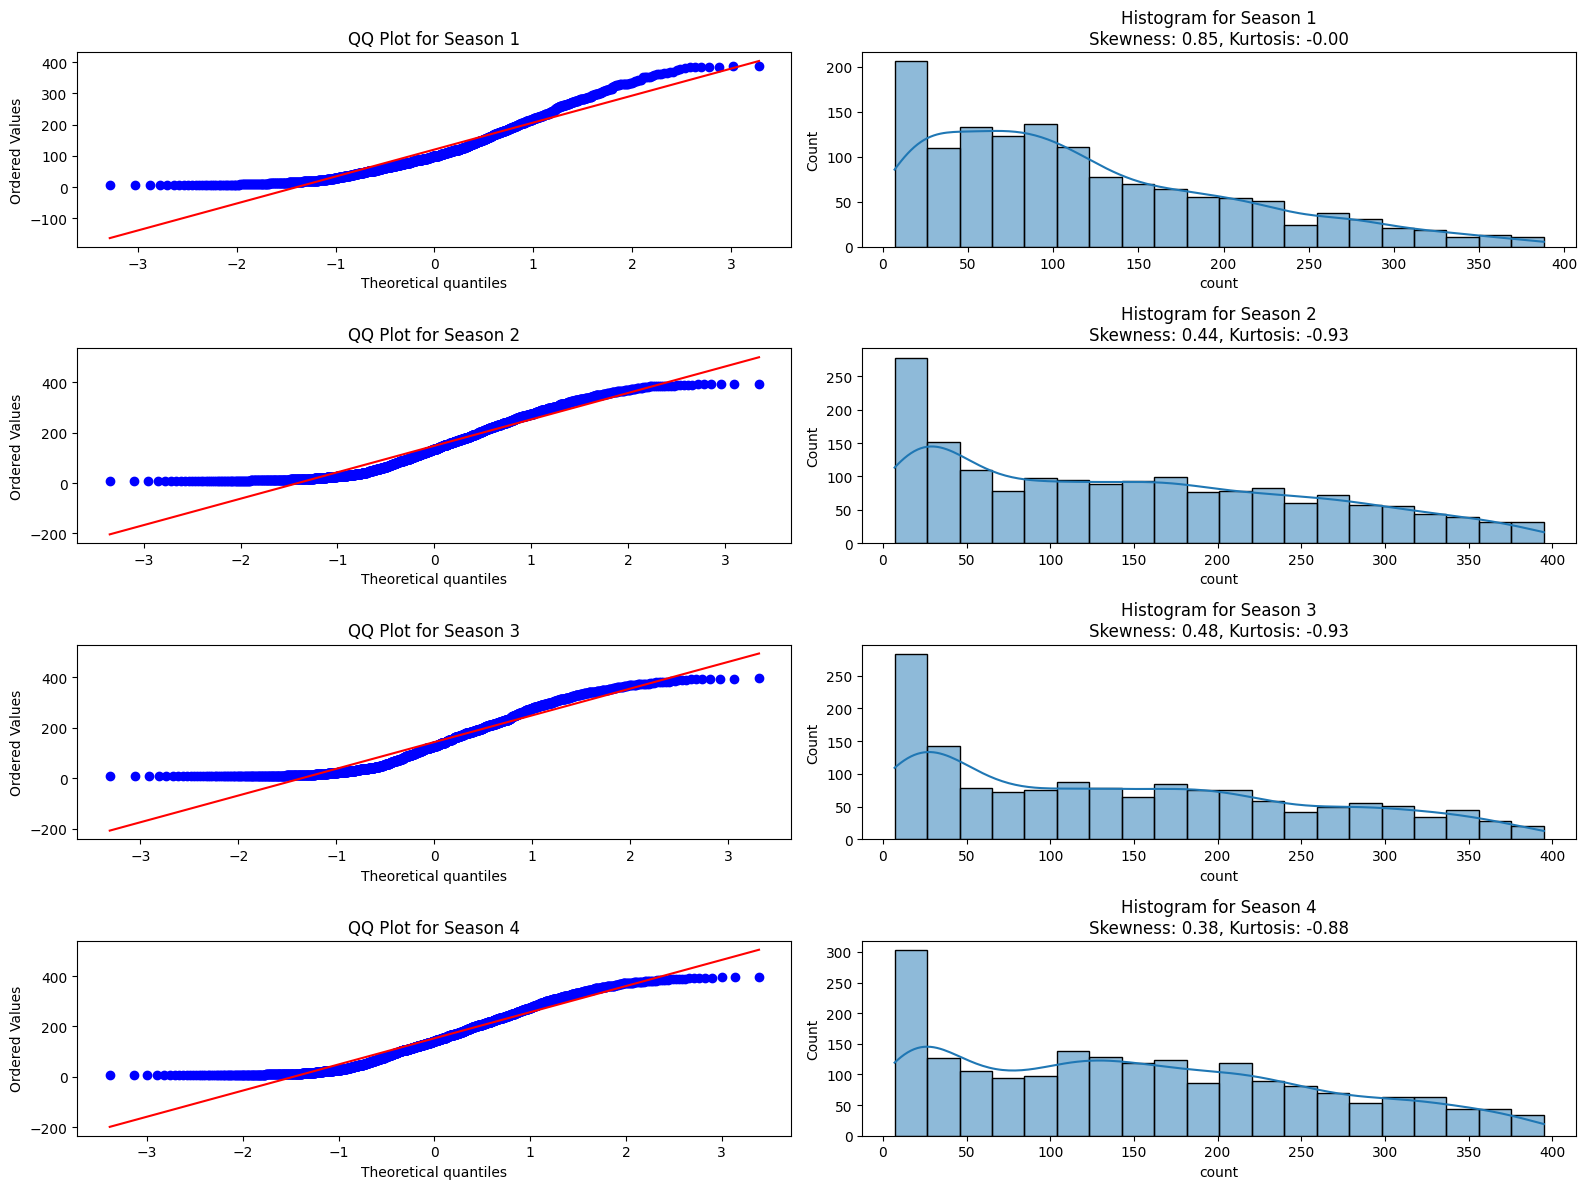

Since it doesnt meet the assumptions can not perform ANOVA, Perform Kruskal test to check Hypothesis
Performing Kruskal Wallis Test
Kruskal-Wallis Test p-value: 1.2504985775105696e-14
Reject H0, there is a significant difference in bicycle demand across different seasons


In [ ]:

#check normality and equal variances by shapiro test and levene test
#Checking normality by shapiro test
#H0: The sample is normal distribution
#H1: The sample is not normal distribution
season=data.groupby('season')['count'].agg(['count'])

from scipy.stats import shapiro
stat,pval_shapiro=shapiro(season)
print(f'pval_shapiro:{pval_shapiro}')

if pval_shapiro<significance:
    print('Reject H0, The sample is not normal distribution')
else:
    print('Fail to Reject H0, The sample is normal distribution')

#The sample is normal distribution

#Check similar variances or not
#H0: The sample has similar variances
#H1: The sample doesn't have similar variances
stat,pval_levene=levene(data[data['season']==1]['count'],data[data['season']==2]['count'],data[data['season']==3]['count'],data[data['season']==4]['count'])
print(f'pval_levene:{pval_levene}')
if pval_levene<significance:
    print('Reject H0, The sample doesn\'t have similar variances')
else:
    print('Fail to Reject H0,The sample has similar variances ')

season_data=[data[data['season'] == i]['count'] for i in range(1, 5)]
skewness = [stats.skew(group) for group in season_data]
kurtosis = [stats.kurtosis(group) for group in season_data]

# Plot QQ plots and histograms for each weather condition
plt.figure(figsize=(16, 12))

for i in range(4):
    plt.subplot(4, 2, 2*i + 1)
    stats.probplot(season_data[i], dist="norm", plot=plt)
    plt.title(f'QQ Plot for Season {i+1}')

    plt.subplot(4, 2, 2*i + 2)
    sns.histplot(season_data[i], kde=True, bins=20)
    plt.title(f'Histogram for Season {i+1}\nSkewness: {skewness[i]:.2f}, Kurtosis: {kurtosis[i]:.2f}')

plt.tight_layout()
plt.show()

# Output skewness and kurtosis values
skewness, kurtosis


#The sample doesn't have similar variances
print('Since it doesnt meet the assumptions can not perform ANOVA, Perform Kruskal test to check Hypothesis')
print('Performing Kruskal Wallis Test')
# Since it doesn't meet assumptions of ANOVA, Perform Kruskal test to check Hypothesis
from scipy.stats import kruskal

#H0: There is no significant difference in bicycle demand across different seasons
#H1: There is significant difference in bicycle demand across different seasons

# Perform the Kruskal-Wallis H-test for independent samples
stat, pval_kruskal = kruskal(
    data[data['season'] == 1]['count'],
    data[data['season'] == 2]['count'],
    data[data['season'] == 3]['count'],
    data[data['season'] == 4]['count']
)
print(f'Kruskal-Wallis Test p-value: {pval_kruskal}')

if pval_kruskal<significance:
    print('Reject H0, there is a significant difference in bicycle demand across different seasons')
else:
    print('Fail to Reject H0, there is no significant difference in bicycle demand across different seasons')

### **Inference and Conclusion**
**Shapiro-Wilk Test for Normality:**

- **p-value:** 0.878
- **Conclusion:** The pvalue is greater than significance (0.05), so we fail to reject the null hypothesis. This indicates that the sample data is normally distributed.

**Levene's Test for Equality of Variances:**

- **p-value:** 2.28x10^-29
- **Conclusion:** The pvalue is lesser than significance (0.05), so we reject the null hypothesis. This indicates that the variances across the different  seasons are not similar.

Since the assumption of similar variances is violated, ANOVA is not suitable. Instead Kruskal-Wallis Test was performed.

#### **QQ Plots and Histogram**
- **Season 1 (Spring):**

    **QQ Plot:** The QQ plot shows a deviation from the normal line, especially at the tails, indicating that the distribution is not perfectly normal.

    **Histogram:** The histogram indicates a right-skewed distribution with a peak at lower rental counts and a long tail extending towards higher counts.

    **Skewness:** 0.85 (indicating moderate positive skewness).

    **Kurtosis:** -0.00 (indicating a distribution close to normal kurtosis).
- **Season 2 (Summer):**

    **QQ Plot:** The QQ plot shows a slight deviation from the normal line, particularly in the upper tail, indicating some positive skewness.

    **Histogram:** The histogram is right-skewed, with a peak at lower counts and a gradual decrease as rental counts increase.

    **Skewness:** 0.44 (indicating slight positive skewness).

    **Kurtosis:** -0.93 (indicating the distribution is flatter than normal).
- **Season 3 (Fall):**

    **QQ Plot:** The QQ plot shows deviations from the normal line, particularly at the tails, indicating non-normality with slight positive skewness.

    **Histogram:** The histogram is right-skewed with a peak at lower counts and a tail that gradually decreases as rental counts increase.

    **Skewness:** 0.48 (indicating slight positive skewness).

    **Kurtosis:** -0.93 (indicating the distribution is flatter than normal).
- **Season 4 (Winter):**

    **QQ Plot:** The QQ plot shows deviations from the normal line, especially at the tails, indicating non-normality with slight positive skewness.

    **Histogram:** The histogram is right-skewed, with a peak at lower counts and a long tail extending towards higher counts.

    **Skewness:** 0.38 (indicating slight positive skewness).

    **Kurtosis:** -0.88 (indicating the distribution is flatter than normal).


**Kruskal-Wallis Test:**
- **p-value:** 1.25x10^14
- **Conclusion:** The p-value is much smaller than the significance level (0.05), so we reject the null hypothesis. This indicates that there is a significant difference in bicycle demand across different seasons.




##### **Recommendation based on Analysis**
- It indicates the demand in bicycle gets impacted by season. It is advisable to adjust the number of available bikes seasonally. For example, if demand is higher in the summer and fall, the company should increase the number of bikes available during these periods to meet the higher demand.
- The company can implement dynamic pricing based on seasonal demand. Higher prices can be charged during peak seasons to maximize revenue, while discounts can be offered during off-peak seasons to encourage more usage.
---
### **Check if the Weather conditions are significantly different during different Seasons?**
- Seasons => **Categorical**
- Weather => **Categorical**
- Categorical vs Categorical => **Chi Square Test**


In [ ]:
from scipy.stats import chi2_contingency

#H0: Seasons and Weather are independent
#H1: Seasons and Weather are dependent
stat, pval_chi2_contingency,dof,expected_freq = chi2_contingency(pd.crosstab(data['season'], data['weather']))
print(f'pval_chi2_contingency:{pval_chi2_contingency}')

if pval_chi2_contingency<significance:
    print('Reject H0, Seasons and Weather are dependent')
else:
    print('Fail to Reject H0, Seasons and Weather are independent')

pval_chi2_contingency:0.001412177046726468
Reject H0, Seasons and Weather are dependent


### **Inference and Conclusion**
- **p-value:** 0.014
- **Conclusion:** Since the p-value is less than the significance level (0.05), we reject the null hypothesis (H₀). This means that there is a statistically significant association between seasons and weather conditions.

##### **Recommendations based on Analysis**
- **Seasonal Planning:**

    - **Inventory and Resource Management:** Since weather and seasons are dependent, it's essential to align bike availability with expected weather patterns. For instance, if winter often brings poor weather, you might reduce bike availability or offer promotions to encourage rentals during these times.
- **User Experience Enhancement:**

    - **Weather-Dependent Offers:** Create special offers or incentives that take into account the likely weather in each season. For instance, offering discounts on rainy days in autumn could maintain demand during less favorable conditions.
- **Predictive Analytics:**
    - Use historical data on weather and seasons to predict future demand and adjust operations accordingly. This could include staffing, bike maintenance schedules, and customer service adjustments.

